In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_excel('In store Transactions Sample.xlsx', sheet_name='Transactions')

In [3]:
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200801,20080227,4,21,1,1.83,PRD0900159,CL00029,DEP00008,G00004,...,MM,OT,994109900672999,M,UM,Small Shop,Fresh,STORE00001,LS,E02
1,200801,20080227,4,21,1,0.86,PRD0900531,CL00026,DEP00008,G00004,...,MM,OT,994109900672999,M,UM,Small Shop,Fresh,STORE00001,LS,E02
2,200801,20080226,3,16,1,1.12,PRD0900925,CL00035,DEP00009,G00004,...,NaN,NaN,994109900067463,M,UM,Small Shop,Fresh,STORE00001,LS,E02
3,200801,20080228,5,19,3,3.42,PRD0901465,CL00005,DEP00002,G00001,...,MM,OA,994109900364398,M,UM,Small Shop,Fresh,STORE00001,LS,E02
4,200801,20080227,4,21,1,0.97,PRD0902700,CL00042,DEP00011,G00004,...,MM,OT,994109900672999,M,UM,Small Shop,Fresh,STORE00001,LS,E02


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80661 entries, 0 to 80660
Data columns (total 22 columns):
SHOP_WEEK                   80661 non-null int64
SHOP_DATE                   80661 non-null int64
SHOP_WEEKDAY                80661 non-null int64
SHOP_HOUR                   80661 non-null int64
QUANTITY                    80661 non-null int64
SPEND                       80661 non-null float64
PROD_CODE                   80661 non-null object
PROD_CODE_10                80661 non-null object
PROD_CODE_20                80661 non-null object
PROD_CODE_30                80661 non-null object
PROD_CODE_40                80661 non-null object
CUST_CODE                   64984 non-null object
CUST_PRICE_SENSITIVITY      64984 non-null object
CUST_LIFESTAGE              57917 non-null object
BASKET_ID                   80661 non-null int64
BASKET_SIZE                 80661 non-null object
BASKET_PRICE_SENSITIVITY    80661 non-null object
BASKET_TYPE                 80661 non-null obj

**Calculate Total Purchase**

In [5]:
df['TOTAL_PRICE']=df['QUANTITY']*df['SPEND']

In [6]:
df.describe()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,BASKET_ID,TOTAL_PRICE
count,80661.000000,8.066100e+04,80661.000000,80661.000000,80661.000000,80661.000000,8.066100e+04,80661.000000
mean,200802.004624,2.008029e+07,3.979073,14.858879,1.593620,1.960677,9.941100e+14,4.349692
std,0.813637,3.481709e+01,1.993215,3.670340,1.884405,2.892889,8.136288e+07,28.322846
min,200801.000000,2.008022e+07,1.000000,8.000000,1.000000,0.010000,9.941099e+14,0.010000
25%,200801.000000,2.008030e+07,2.000000,12.000000,1.000000,0.780000,9.941099e+14,0.810000
50%,200802.000000,2.008031e+07,4.000000,15.000000,1.000000,1.250000,9.941100e+14,1.350000
75%,200803.000000,2.008031e+07,6.000000,18.000000,1.000000,2.120000,9.941101e+14,2.550000
max,200803.000000,2.008032e+07,7.000000,21.000000,107.000000,184.800000,9.941101e+14,3951.360000


**Total Revenue and it's 80%**

*It is believed that 80% of revenue comes from 20% of customers. However, analysis of cummulative profits generated by customers proves it wrong for this specific case, probability due to limited data from a timeframe of only 3 weeks.*

In [7]:
df['TOTAL_PRICE'].sum()*0.8

280680.408

In [8]:
df['SHOP_DATE']=df['SHOP_DATE'].apply(lambda x: dt.datetime.strptime(str(x), '%Y%m%d'))

In [9]:
df['MONTH']=df['SHOP_DATE'].apply(lambda x: x.month)
df['DAY']=df['SHOP_DATE'].apply(lambda x: x.day)

In [10]:
df['CUST_CODE'].nunique()

2626

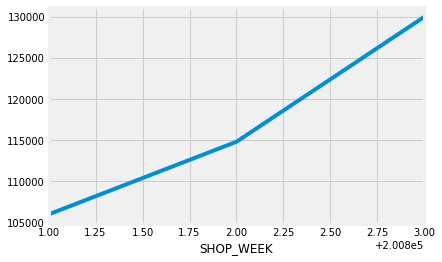

In [32]:
df.groupby('SHOP_WEEK').sum()['TOTAL_PRICE'].plot()

Text(0.5, 0, 'Purchase Week')

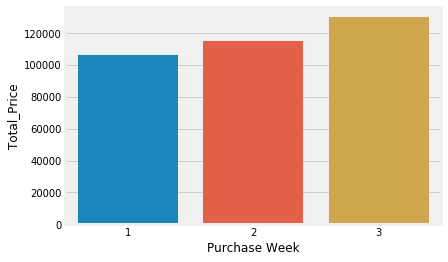

In [31]:
sns.barplot(x=[1,2,3], y=df.groupby('SHOP_WEEK').sum()['TOTAL_PRICE'])
plt.ylabel('Total_Price')
plt.xlabel('Purchase Week')

In [12]:
pivot_weekly=df.pivot_table(index='CUST_CODE', columns='SHOP_WEEK', values='TOTAL_PRICE', aggfunc='sum')

**Those customer whose purchase has been increased every week**

In [13]:
pivot_weekly[(pivot_weekly[200801]<pivot_weekly[200802]) & (pivot_weekly[200802]<pivot_weekly[200803])]

SHOP_WEEK,200801,200802,200803
CUST_CODE,,,
CUST0000001392,25.32,27.68,32.80
CUST0000001437,0.85,1.89,27.59
CUST0000003447,24.11,64.08,74.72
CUST0000007046,19.42,27.31,48.86
CUST0000007988,0.98,3.39,14.08
...,...,...,...
CUST0000969621,0.98,5.38,77.10
CUST0000971633,66.30,112.21,165.38
CUST0000974297,9.81,34.76,418.75


**Recognize the most profitable customers**

In [14]:
df.groupby('CUST_CODE').sum().sort_values('TOTAL_PRICE',ascending=False).shape

(2626, 9)

In [15]:
cumprof=[]
for i in range(1,2627):
    cumprof.append(df.groupby('CUST_CODE').sum().sort_values('TOTAL_PRICE',ascending=False).head(i).sum()['TOTAL_PRICE'])

In [16]:
cumprof=pd.DataFrame(data=cumprof, index=range(1,2627), columns=['CUMPROF'])

Text(0, 0.5, 'Revenue')

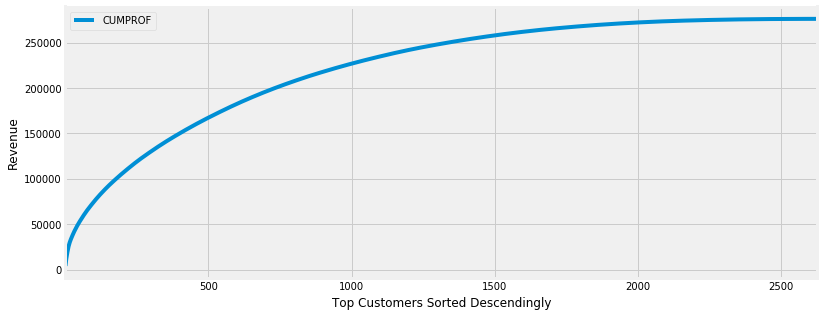

In [17]:
cumprof.plot(figsize=(12,5))
plt.xlabel('Top Customers Sorted Descendingly')
plt.ylabel('Revenue')

**Filter 1500 top customers**

In [180]:
top1500index=df.groupby('CUST_CODE').sum().sort_values('TOTAL_PRICE',ascending=False).iloc[:1500,:].index

**How much is the repeat rate, and churn rate?**

In [102]:
##of customer who purchased atleast two different times
repeat=sum(df.groupby(['CUST_CODE','SHOP_DATE']).count()['SHOP_WEEK'].unstack().apply(lambda x: x.count(), axis=1)>1) 

In [114]:
repeat_rate=repeat/df['CUST_CODE'].nunique()

In [119]:
repeat_rate*100

76.00913937547601

In [117]:
churn=1-repar_rate

In [120]:
churn*100

23.99086062452399

Text(0.5, 0, '# of purchase repetition')

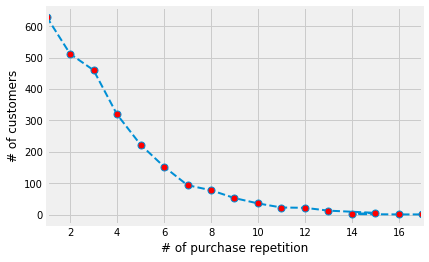

In [156]:
df.groupby(['CUST_CODE','SHOP_DATE']).count()['SHOP_WEEK'].unstack().apply(lambda x: x.count(), 
                    axis=1).value_counts().plot(marker='o', linestyle='--', linewidth=2, 
                    markersize=7, mfc='red')
plt.ylabel('# of customers')
plt.xlabel('# of purchase repetition')

In [162]:
REPEAT=pd.DataFrame(df.groupby(['CUST_CODE','SHOP_DATE']).count()['SHOP_WEEK'].unstack().apply(lambda x: x.count(),axis=1), columns=['REPEAT'])

**We filter the customers with more than 1 purchases**

In [228]:
repindex=REPEAT[REPEAT['REPEAT']>1].index

**We create a dataframe including only those customers with more than 1 purchase and in the list of top 1500 members. This is to capture both frequency and monetary. Three elements of CLTV are: Frequency, monetary, and recency, however, the total period within which data is available is limitted to 3 consecutive weeks only and we can not take recency into account.** 

In [232]:
filtered_indeces=np.intersect1d(np.array(repindex), np.array(top1500index))

In [234]:
filtered_indeces.shape # we have 1355 customers with more than one purchase who are also in the 1500-top-customers list.

(1355,)

In [258]:
top_customers=df[df['CUST_CODE'].apply(lambda x: x in list(filtered_indeces))]

In [259]:
top_customers.head(3)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,TOTAL_PRICE,MONTH,DAY
3,200801,2008-02-28,5,19,3,3.42,PRD0901465,CL00005,DEP00002,G00001,...,M,UM,Small Shop,Fresh,STORE00001,LS,E02,10.26,2,28
5,200801,2008-02-25,2,17,1,0.19,PRD0903052,CL00031,DEP00008,G00004,...,S,UM,Small Shop,Fresh,STORE00001,LS,E02,0.19,2,25
12,200801,2008-02-28,5,19,1,2.65,PRD0904036,CL00198,DEP00067,G00021,...,M,UM,Small Shop,Fresh,STORE00001,LS,E02,2.65,2,28


### What is the contribution of different parameters (below) in total_price earned from top customers purchases
* BASKET_PRICE_SENSITIVITY
* PROD_CODE
* BASKET_SIZE
* BASKET_TYPE
* BASKET_DOMINANT_MISSION
* STORE_FORMAT
* STORE_REGION

In [267]:
top_customers.groupby('BASKET_PRICE_SENSITIVITY').sum()

,SHOP_WEEK,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,BASKET_ID,TOTAL_PRICE,MONTH,DAY
BASKET_PRICE_SENSITIVITY,,,,,,,,,
LA,2.066052e+09,40706.0,151261.0,17163.0,18836.31,1.022840e+19,44971.59,28506.0,131504.0
MM,5.898559e+09,117367.0,430475.0,47867.0,59586.18,2.920198e+19,130970.78,80992.0,383510.0
UM,2.708819e+09,54451.0,196693.0,21513.0,29058.14,1.341054e+19,61616.08,37340.0,172746.0
XX,3.032111e+07,610.0,1989.0,333.0,364.29,1.501106e+17,590.05,426.0,1803.0


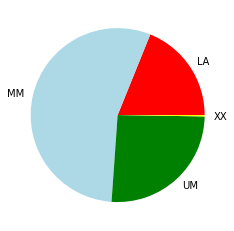

In [280]:
plt.pie(x=top_customers.groupby('BASKET_PRICE_SENSITIVITY').sum()['TOTAL_PRICE'], labels=['LA','MM','UM','XX'],colors=['red','lightblue', 'green','yellow'] )
plt.show()

**What are the top 30 most frequently purchased items?**

Text(0.5, 0, 'Product Code')

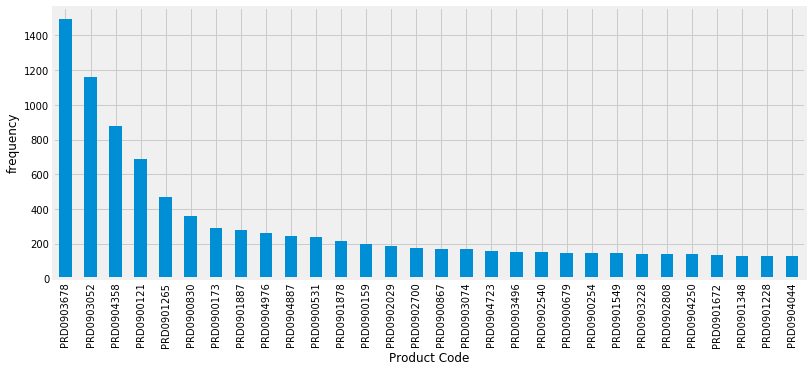

In [306]:
top_customers['PROD_CODE'].value_counts().head(30).plot.bar(figsize=(12,5))
plt.ylabel('frequency')
plt.xlabel('Product Code')

**What are those stores with most purchase**

Text(0.5, 0, 'Store Region')

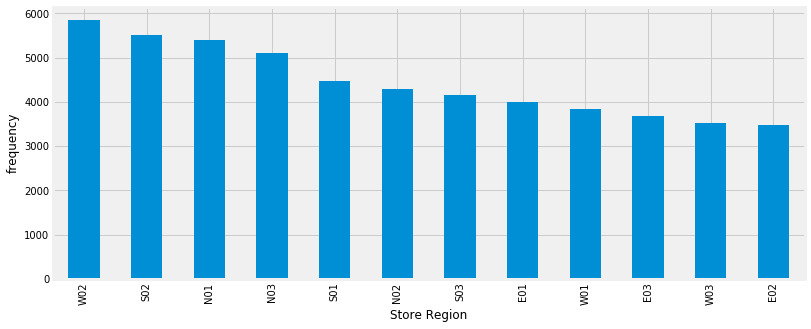

In [311]:
top_customers['STORE_REGION'].value_counts().head(30).plot.bar(figsize=(12,5))
plt.ylabel('frequency')
plt.xlabel('Store Region')

**What are stores with most purchase value**

Text(0.5, 0, 'Store Region')

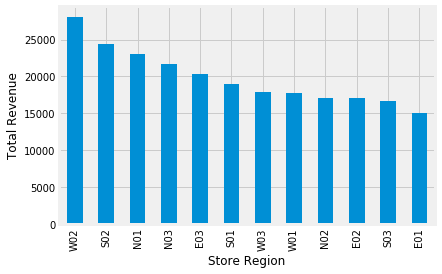

In [316]:
top_customers.groupby('STORE_REGION').sum()['TOTAL_PRICE'].sort_values(ascending=False).plot.bar()
plt.ylabel('Total Revenue')
plt.xlabel('Store Region')

**Are those stores with most purchases, also the ones produced higher revenue?**

*Answer: Yes for the first top four stores*

**Which store formats produced more revenue?**

Text(0.5, 0, 'Store Format')

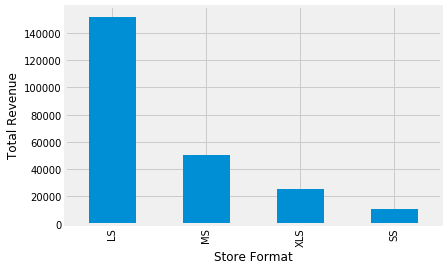

In [317]:
top_customers.groupby('STORE_FORMAT').sum()['TOTAL_PRICE'].sort_values(ascending=False).plot.bar()
plt.ylabel('Total Revenue')
plt.xlabel('Store Format')

**What are BASKET_DOMINANT_MISSIONs from which most revenue is generated?**

Text(0.5, 0, 'BASKET_DOMINANT_MISSION')

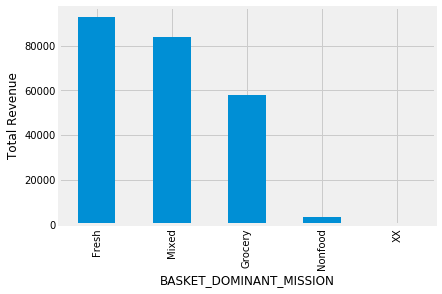

In [319]:
top_customers.groupby('BASKET_DOMINANT_MISSION').sum()['TOTAL_PRICE'].sort_values(ascending=False).plot.bar()
plt.ylabel('Total Revenue')
plt.xlabel('BASKET_DOMINANT_MISSION')

**What is the purchase distribution of different BASKET_DOMINANT_MISSIONs in stores with different formats?**

C:\Users\Mehdi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


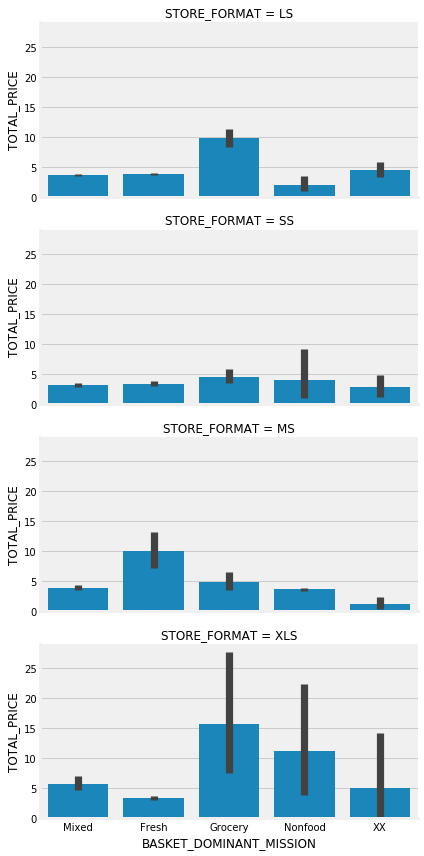

In [359]:
g=sns.FacetGrid(row='STORE_FORMAT', data=top_customers, aspect=2, height=3)
g.map(sns.barplot, 'BASKET_DOMINANT_MISSION', 'TOTAL_PRICE')
plt.tight_layout()

**What is the relationship between customer lifestage and total revenue produced from customer?** 

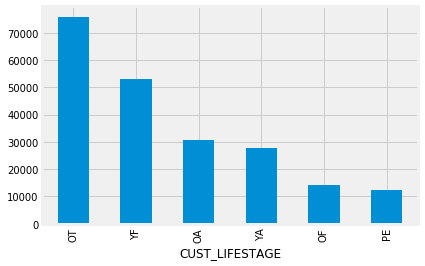

In [370]:
top_customers.groupby('CUST_LIFESTAGE').sum()['TOTAL_PRICE'].sort_values(ascending=False).plot.bar()